In [16]:
# bibliotecas
import numpy as np
import sympy as sp
import matplotlib.pyplot       as plt
from   scipy.signal            import lsim, lti, step, impulse
from   IPython.core.pylabtools import figsize
from   IPython.display         import Image
from   platform                import python_version

def find_nearest(a, a0, t):
    "Encontra o elemento mais próximo dentro o array a com valor a0 junto com o tempo"
    idx = np.abs(a - a0).argmin()
    return t[idx], a.flat[idx]

def plotaResposta(t, saida, entrada, titulo, yLabel, hline=None, ylim=None, ponto=None, legPonto=None):
    # visulizando resposta
    if hline: plt.hlines(y=hline, xmin=min(t), xmax=max(t), linestyle='dashed')
    if ylim:  
        plt.xlim(0,max(t))
        plt.ylim(min(saida), np.abs(max(saida))*ylim)
        
    plt.plot(t, saida, color='r')
    
    if ponto:
        ponto = find_nearest(saida, ponto, t)
        plt.plot(ponto[0], ponto[1] ,marker='o', color='b', markersize=10,
                 label='t = %.1fs\ny = %.2f\n\n(%s)' % (ponto[0], ponto[1], legPonto))

    plt.title(titulo+' \n')
    plt.xlabel('\n Tempo (s)')
    plt.ylabel(yLabel +  '\n')
    plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.5)
    plt.legend(loc='lower right')
    plt.show()

figsize(12, 8)                         # tamanho gráficos
plt.rcParams.update({'font.size': 14}) # tamanho da fonte
sp.init_printing()                     # printar variáveis simbólicas

print('\nVersão da Linguagem Python usada neste relatório: %s\n' % python_version())


Versão da Linguagem Python usada neste relatório: 3.7.6



# Exe 1

In [17]:
omega_n=.5
csi=.5
a0=1/omega_n**2
a1=2*csi/omega_n
a2=1

num=[1]
den=[a0, a1, a2]
Gs = (num,den)

t = np.arange(0,50,1e-2)
u = np.ones(len(t))*2

t_out, y_out, x_out = lsim(Gs, u, t)

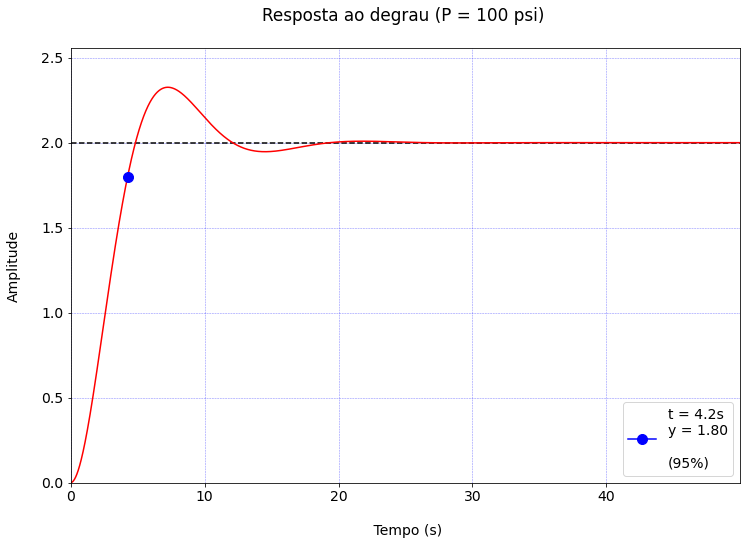

In [18]:
plotaResposta(t_out, y_out, u,
              'Resposta ao degrau (P = 100 psi)',
              yLabel='Amplitude',
              hline=2,
              ylim=1.1,
              ponto=2*0.9,
              legPonto='95%')


# Exe 2

In [20]:
cis     = 0.7
f       = 1000
omega_n = 2*np.pi*f
omega_n

In [31]:
omega = sp.symbols('omega')

den1 = (1 - (omega/omega_n)**2)**2
den2 = (2*csi*omega/omega_n)**2

eq1 = sp.Eq(1/(den1 + den2)**0.5, 0.95)
eq1

In [32]:
sol = sp.solve(eq1, omega)

In [33]:
sol

In [34]:
omega = sp.symbols('omega')

den1 = (1 - (omega/omega_n)**2)**2
den2 = (2*csi*omega/omega_n)**2

eq2 = sp.Eq(1/(den1 + den2)**0.5, 1.05)

sol = sp.solve(eq2, omega)

sol

In [39]:
omega_entrada = [6584.9, 2023.64, 5948.39]
f_entrada = list(map(lambda x: x/(2*np.pi), omega_entrada))
f_entrada

In [ ]:
omega_entrada = 6584.9
f_entrada = omega_entrada/(2*np.pi)
f_entrada

# Exe 3

In [42]:
tau=1e-3
1/tau*((1/.99)**2 - 1)**0.5

# Exe 4

In [62]:
tau=2e-3
1/tau*((1/.993)**2 - 1)**0.5

In [53]:
-np.arctan(omega*tau)*np.pi/180

## Exe 5

In [9]:
Td = 6.1e-3
f = 1/Td
f

163.93442622950818

In [ ]:
1) 4,3s 
2) 314 Hz 
3) a) 
4) 42.1 Hz 
5) 175,43 Hz

In [ ]:
6.7 Hz
591 Hz
4,3 s


1) 4,3s
2) 314 Hz
3) a)
4) 42.1 Hz
5) 175,43 Hz